# Time Optimal Velocity Profiles

When the maze solver commands that the robot go forward, it can say that it must go forward one or more squares depending on what it knows about the maze. When we don't know what is after the square we pass through, we must be going slow enough to handle any scenario. In other words, there is some $V_f$ that we must reach by the end of our motion. We also begin motions at this speed, since between we arrived where we are we required that we reach $V_f$ to get there. Therefore, we start and end at $V_f$, and we want to cover some distance $d$ in the fast possible time. To do so, we accelerate at our fixed $a$ until we reach max speed, or until we need to start slowing down (whichever comes first). This gives us a trapezoid shaped velocity profile.

In [4]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


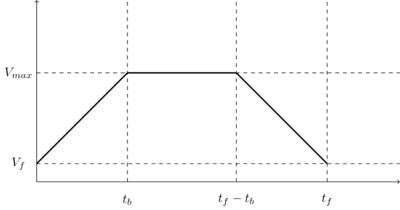

In [33]:
%%tikz -s 400,400
\draw[->] (0,0) -- (10,0);
\draw[->] (0,0) -- (0,5);

\draw[line width=1] (0,0.5) -- (2.5,3);
\draw[line width=1] (2.5,3) -- (5.5,3);
\draw[line width=1] (5.5,3) -- (8,0.5);
\draw[dashed] (0,0.5) -- (10,0.5);
\draw[dashed] (0,3) -- (10,3);
\draw[dashed] (2.5,0) -- (2.5,5);
\draw[dashed] (5.5,0) -- (5.5,5);
\draw[dashed] (8,0) -- (8,5);

\draw (-0.5, 0.5) node {$V_{f}$};
\draw (-0.5, 3) node {$V_{max}$};
\draw (2.5, -0.5) node {$t_b$};
\draw (5.5, -0.5) node {$t_f-t_b$};
\draw (8, -0.5) node {$t_f$};

The time to accelerate from $V_f$ to $V_{max}$ is $t_b = \frac{V-V_f}{a}$. We can substitute this into newtons first equation of motion as follows.

\begin{align}
d &= Vt_b - \frac{1}{2}a{t_b}^2 \\
  &= V\Big(\frac{V-V_f}{a}\Big) - \frac{1}{2}a\Big(\frac{V-V_f}{a}\Big)^2 \\
  &= \Big(\frac{V^2-VV_f}{a}\Big) - \Big(\frac{a(V-V_f)^2}{2a^2}\Big) \\
  &= \Big(\frac{2V^2-2VV_f}{2a}\Big) - \Big(\frac{V^2-2VV_f+{V_f}^2}{2a}\Big) \\
  &= \frac{2V^2-2VV_f - V^2 + 2VV_f - {V_f}^2}{2a} \\
d &= \frac{V^2-{V_f}^2}{2a} \\
\end{align}

For example, if you're at starting at $V_f=0.2\frac{m}{s}$, and you're ramping up to $V=0.5\frac{m}{s}$, and you're acceleration is fixed at the $a=2\frac{m}{s^2}$, the distance you'll need to do that is $d = \frac{0.5 - 0.2}{2*2} = 0.075m$

## Code that proves it

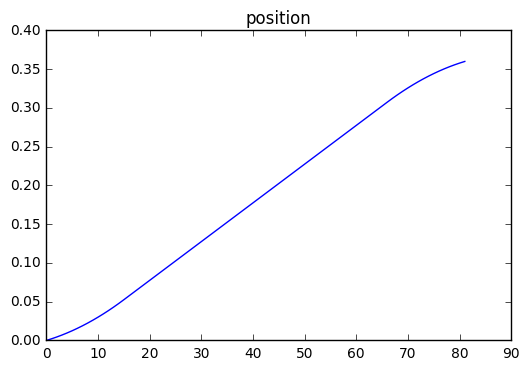

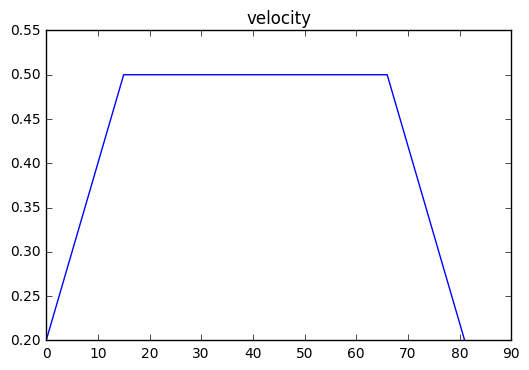

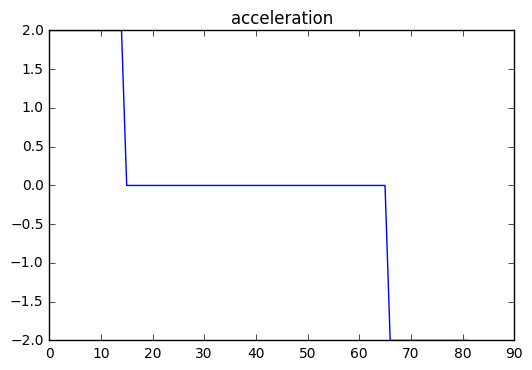

In [60]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=3)

def profile(Vf, V, d, A):
    v = Vf
    x = 0
    a = A
    vs = [v]
    xs = [x]
    a_s = [a]
    
    dt = 0.01
    while x < d:
        ramp_d = (v*v - Vf*Vf) / (2*A)
        
        x = x + v*dt + a*dt*dt/2.0
        v = v + a*dt
        
        if (d-x) <= ramp_d:
            a = -A
        else:
            if v > V:
                a = 0
            else:
                a = A
                
        xs.append(x)
        vs.append(v)
        a_s.append(a)
        
    return xs, vs, a_s

xs, vs, a_s = profile(0.2, 0.5, 0.36, 2)
plt.figure()
plt.title("position")
plt.plot(xs, label='position')
plt.figure()
plt.title("velocity")
plt.plot(vs, label='velocity')
plt.figure()
plt.title("acceleration")
plt.plot(a_s, label='acceleration')
plt.show()